# Detection experiment:

By Catarina Fernandes

Detection experiment:
- input (2):  array of predicted bounding-boxes, array of ground-truth bounding-boxes
- output (3): mIoU, precision, recall, pixel-wise accuracy

In [1]:
import numpy as np 
from sklearn import metrics
from matplotlib import pyplot as plt

In [12]:
class DetectionExperiment():
    
    def __init__(self, predictions_array, ground_truths_array):       
        if predictions_array.shape[0] != ground_truths_array.shape[0]:
            raise ValueError("The predicted bounding boxes and ground truth arrays should have the same dimension.")

        if predictions_array.shape[1] != 4:
            raise ValueError(f"The predicted bounding boxes array should have dimension 4 (x, y, w, h). Instead it has dimension {ground_truths_array.shape[1]}.")

        if ground_truths_array.shape[1] != 4:
            raise ValueError(f"The ground truth array should have dimension 4 (x, y, w, h). Instead it has dimension {ground_truths_array.shape[1]}.")

        if not ((0 <= predictions_array) & (predictions_array <= 1)).all():
            raise ValueError("The values in the predicted bounding boxes array should be between 0 and 1.")

        if not ((0 <= ground_truths_array) & (ground_truths_array <= 1)).all():
            raise ValueError("The values in the ground truth array should be between 0 and 1.")

        self.predictions_array = predictions_array
        self.ground_truths_array = ground_truths_array

    def compute(self):
        self.IoU = []
        self.accuracy = []

        # Iterates through the array of predicted bounding boxes and calculates the IoU and accuracy 
        for index, values in enumerate(self.predictions_array):
            # IoU calculation
            IoU_bbox = self.compute_IoU(index, values)
            self.IoU.append(IoU_bbox)
            # Accuracy calculation
            accuracy_bbox = self.compute_accuracy(index, values)
            self.accuracy.append(np.mean(accuracy_bbox))
            
        mIoU = np.mean(self.IoU)
        mAccuracy = np.mean(self.accuracy)
        
        self.compute_precision_recall()

        return (mIoU, mAccuracy)
    
    def compute_IoU(self, index, values):
        # Computes the IoU of one bounding box
        if values[0] == 0:
            intersection_area = 0
        else:
            intersection_area = max(0, -abs(self.predictions_array[index][0] - self.ground_truths_array[index][1]) + 1) * max(0, -abs(self.predictions_array[index][1] - self.ground_truths_array[index][2]) + 1)

        if self.predictions_array[index][0] == 0:
            union_area = 2
        else:
            union_area = 2-intersection_area

        IoU = intersection_area/union_area

        return IoU

    def compute_accuracy(self, index, values):
        # Computes the accuracy of one bounding box
        accuracies = []
        for i, v in enumerate(values):
            if v != 0:
                intermediate_accuracy = 1-abs(v-self.ground_truths_array[index][i])
            else:
                intermediate_accuracy = 0
            accuracies.append(intermediate_accuracy)

        return accuracies

    def compute_precision_recall(self):
        # Computes the precision-recall curve
        precisions = []
        for t in range(99):
            threshold = (t+1)/100
            precisions.append(len([i for i in self.IoU if i > threshold])/len(self.IoU))

        fig, ax = plt.subplots()
        fig.canvas.draw()
        plt.plot(precisions)
        plt.title("Precision-Recall Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        labels = [0,0,0.2,0.4,0.6,0.8,1]
        ax.set_xticklabels(labels)
        plt.show()    
    
    @staticmethod
    def help(): 
        print("Detection Experiment Usage:\n Define DetectionExperiment instance by creating a variable and assigning it to DetectionExperiment(predictions, ground_thruth).\n   - Parameter predictions should be an array of predicted bounding-boxes (x, y, width, height) with dimension M X 4 . \n   - Parameter ground_truth should be an array of ground truth bounding-boxes (x, y, width, height) with dimension M X 4. \n\n After instancing a variable DetectionExperiment var, the method compute(self) can be called simply by running \"var.compute()\" which will return mIoU, precision-recall and pixel-wise accuracy")


In [7]:
ground_truth = np.array([[0.425, 0.5852, 0.1333, 0.2111],[0.2592, 0.4704, 0.115, 0.1975],[0.9131, 0.4837, 0.1406, 0.2565]])
predictions = np.array([[0.3826,0.5018, 0.0798, 0.1778], [0.5425, 0.6442, 0.0283, 0.0475], [0.8691, 0.3619, 0.0986, 0.2201]])

In [10]:
DetectionExperiment.help()

Detection Experiment Usage:
 Define DetectionExperiment instance by creating a variable and assigning it to DetectionExperiment(predictions, ground_thruth).
   - Parameter predictions should be an array of predicted bounding-boxes (x, y, width, height) with dimension M X 4 . 
   - Parameter ground_truth should be an array of ground truth bounding-boxes (x, y, width, height) with dimension M X 4. 

 After instancing a variable DetectionExperiment var, the method compute(self) can be called simply by running "var.compute()" which will return mIoU, precision-recall and pixel-wise accuracy


<ipython-input-12-2beb9d2d3181>:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


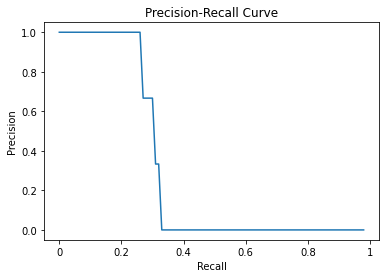

(0.31018163172940927, 0.9041166666666668)

In [13]:
test = DetectionExperiment(predictions, ground_truth)
test.compute()